In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]
scipy: 1.7.1
numpy: 1.21.2
matplotlib: 3.4.3
pandas: 1.3.4
sklearn: 1.0.1


In [2]:
# Data Manipulation
import numpy as np
import pandas as pd
import statistics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Models
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Preformance
import warnings
warnings.filterwarnings("ignore")
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## 1. Loading Data

In [3]:
df = pd.read_csv('data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 2. Exploring Data

In [4]:
print('Shape: ' + str(df.shape))
print('Features: ')
print(pd.get_dummies(df).columns)

Shape: (918, 12)
Features: 
Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
# Checking for NANs
pd.isnull(df).sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## 3. Data Visualization

#### 3.1 Categorical Data

<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

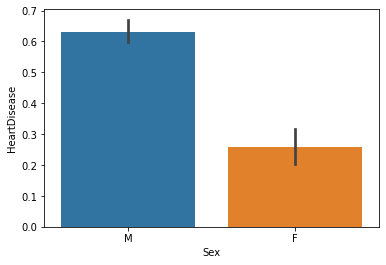

In [8]:
sns.barplot(x='Sex', y='HeartDisease', data=df)

<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

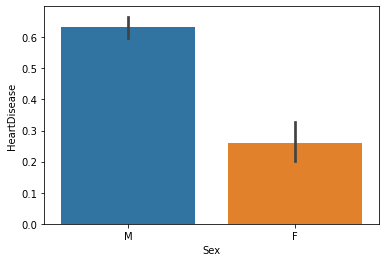

In [9]:
sns.barplot(x='Sex', y='HeartDisease', data=df)

<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

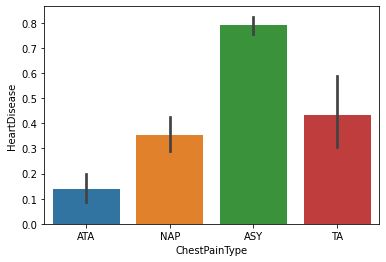

In [10]:
sns.barplot(x='ChestPainType', y='HeartDisease', data=df)

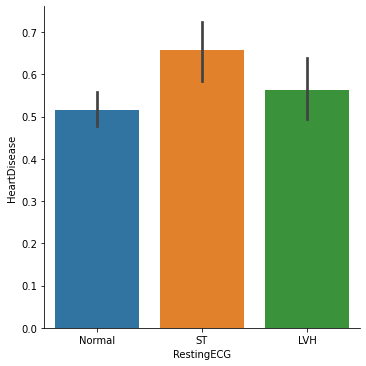

In [11]:
sns.catplot(x='RestingECG', y='HeartDisease', kind='bar', data=df)

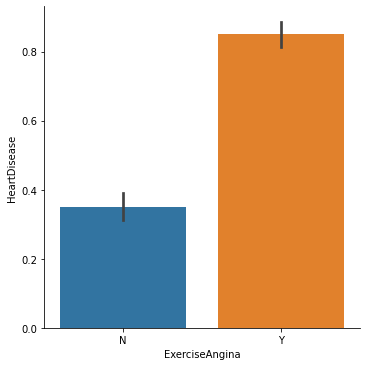

In [12]:
sns.catplot(x='ExerciseAngina', y='HeartDisease', kind='bar', data=df)

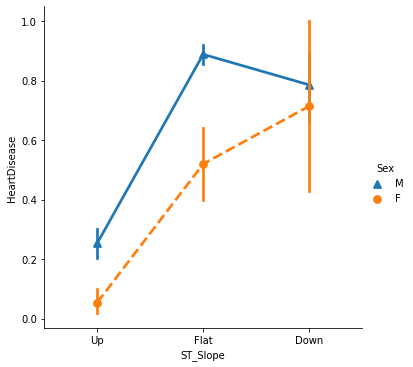

In [13]:
sns.catplot(x='ST_Slope', y='HeartDisease', hue='Sex',
            markers=['^', 'o'], linestyles=['-', '--'],
            kind='point', data=df)

#### 3.2 Numerical

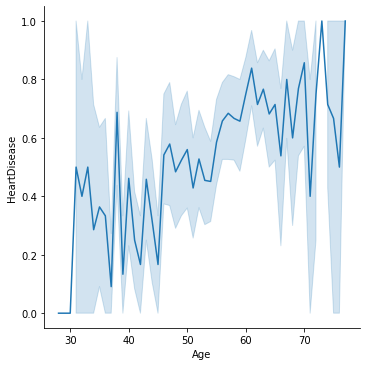

In [14]:
sns.relplot(x='Age', y='HeartDisease', kind='line', data=df)

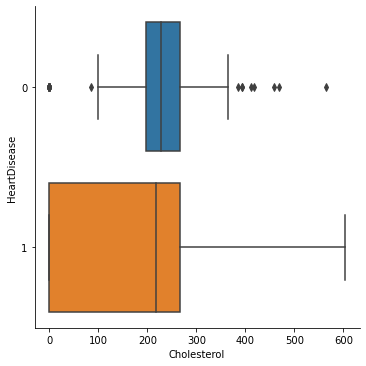

In [15]:
sns.catplot(x='Cholesterol', y='HeartDisease', orient="h", kind="box", data=df)

<AxesSubplot:xlabel='FastingBS', ylabel='HeartDisease'>

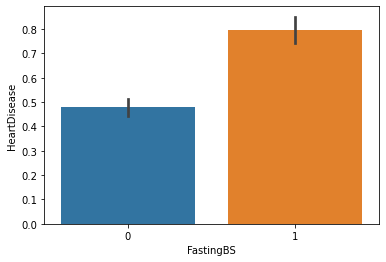

In [16]:
sns.barplot(x='FastingBS', y='HeartDisease', data=df)

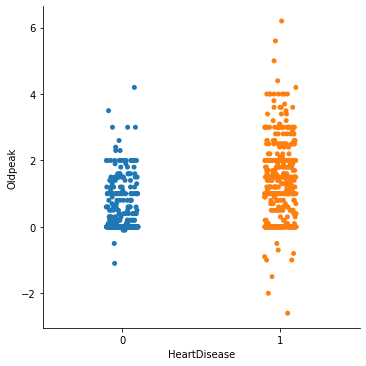

In [17]:
sns.catplot(x="HeartDisease", y="Oldpeak", data=df) 

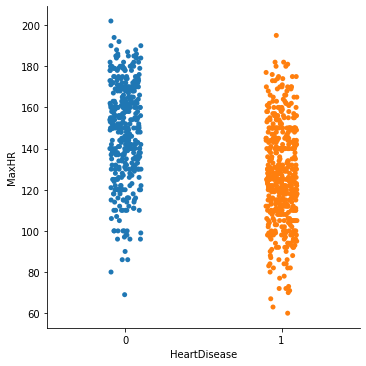

In [18]:
sns.catplot(x="HeartDisease", y="MaxHR", data=df);

## 4. Model Selection

#### 4.1 Data Preprocessing

In [19]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=3)

In [20]:
cat_features = X.select_dtypes(include='object').columns
cat_features = list(cat_features)
num_features = X.select_dtypes(exclude='object')
num_features = list(num_features)

cat_trans = Pipeline(steps=[('oh', OneHotEncoder())])
num_trans = Pipeline(steps=[('stan', StandardScaler())])

ct = ColumnTransformer(transformers=[
    ('cat', cat_trans, cat_features), 
    ('num', num_trans, num_features)])

#### 4.2 Model Selection

In [21]:
models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(), LinearSVC()]
scores = []

for model in models:
    pipe = Pipeline(steps=[('ct', ct), ('model', model)])
    kf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    score = cross_val_score(pipe, X, y, cv=kf, scoring='accuracy', error_score='raise').mean()
    print(f'{model} : {score}')
    scores.append(score)

LogisticRegression() : 0.8606187290969901
KNeighborsClassifier() : 0.8671285236502626
DecisionTreeClassifier() : 0.8027830864787386
GaussianNB() : 0.8551720019111324
RandomForestClassifier() : 0.8736860965121835
LinearSVC() : 0.8606187290969901


**NOTE:** LogisticRegression, KNeighborsClassifier, RandomForestClassifier(), and LinearSVC() have similar accuracy scores, so let's look at what specifically the models are predicting.


In [22]:
models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), LinearSVC()]
f1_scores = []
for model in models:
    pipe = Pipeline(steps=[('ct', ct), ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_val)
    print(f'{model}:')
    print(classification_report(y_val, y_pred))
    

LogisticRegression():
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       134
           1       0.89      0.89      0.89       169

    accuracy                           0.88       303
   macro avg       0.88      0.88      0.88       303
weighted avg       0.88      0.88      0.88       303

RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       134
           1       0.90      0.92      0.91       169

    accuracy                           0.90       303
   macro avg       0.90      0.90      0.90       303
weighted avg       0.90      0.90      0.90       303

KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       134
           1       0.89      0.92      0.90       169

    accuracy                           0.89       303
   macro avg       0.89      0.89      0.89       303
we

**NOTE:**
Chose Random Forest because of its overall higher scores in precision, recall, and f1 scores. Random Forest also has a higher f1 score when it comes to prdicting a postivtive for heart disese. This is good because it would be better to have a false postive then a false negivtive when it comes to heart disease.

#### 4.3 Parameter tuning 

In [23]:
rfc_parm = {'model__n_estimators' : [4, 5, 6, 7, 8, 9, 10, 15], 
              'model__criterion' : ['gini', 'entropy'],
              'model__max_features' : ['auto', 'sqrt', 'log2'], 
              'model__max_depth' : [2, 3, 5, 10], 
              'model__min_samples_split' : [2, 3, 5, 10],
              'model__min_samples_leaf' : [1, 5, 8, 10],
              'model__bootstrap' : [True, False],
              'model__warm_start' : [True, False],
              'model__class_weight' : ['balanced', 'balanced_subsample']
             }

9*## RandomForestClassifier().get_params().keys()

In [24]:
pipe = Pipeline(steps=[('ct', ct), ('model', RandomForestClassifier())])
kf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
grid_cv = GridSearchCV(estimator=pipe, param_grid=rfc_parm, cv=kf, error_score='raise')
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'model__bootstrap': False, 'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 3, 'model__n_estimators': 7, 'model__warm_start': True}
0.8699365415124273
